In [5]:
GDRIVE_PWD = 'Nuclei_Detection'

try:
    from google.colab import drive
    import os
    IN_COLAB = True
except:
    IN_COLAB = False
    
if IN_COLAB:
    drive.mount('/content/gdrive')#, force_remount=True)
    root_dir = "/content/gdrive/My Drive/"
    base_dir = os.path.join(root_dir, GDRIVE_PWD)
    
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)
    os.chdir(base_dir)

Mounted at /content/gdrive


In [6]:
os.listdir()

['stage1_test.zip',
 'stage1_solution.csv.zip',
 'stage1_sample_submission.csv.zip',
 'stage1_train.zip',
 'stage2_test_final.zip',
 'stage1_train_labels.csv.zip',
 'stage2_sample_submission_final.csv.zip',
 'stage1_train',
 'stage1_test',
 'train',
 'test',
 '647.png',
 'Extractor.ipynb']

In [4]:
#Loading up all the packages

#Data structure / manipulation
import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt

#For a progress bar: 
from tqdm import tqdm

#For data processing
import sys
from skimage.io import imread
from skimage.transform import resize

In [31]:
#Creating these two folders
!mkdir stage1_train stage1_test train test

In [32]:
#Unzip it such that we can acutally use it. 
#Unzip (quite mode) from this link, it's a directory, and shove it into this folder
!unzip -q "stage1_train.zip" -d stage1_train/
print('done1')
!unzip -q "stage1_test.zip" -d stage1_test/
print('done2')

done1
done2


In [33]:
#We go through the folders and just grab the names of the folders
train_ids = next(os.walk('./stage1_train'))[1]
test_ids = next(os.walk('./stage1_test'))[1]

In [34]:
#Checking to make sure we actually grabbed the ids
len(train_ids), len(test_ids)

(670, 65)

In [35]:
#Setting the variables up so we can use them again in the future
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [36]:
from skimage.io import imsave

In [83]:

X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)

sys.stdout.flush()
cnt = 0
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = './stage1_train/' + id_
    # img = imread(path + "/images/" + id_ + '.png')[:,:,:IMG_CHANNELS]
    # img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    # X_train[n] = img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)
    Y_train[n] = mask


100%|██████████| 670/670 [08:26<00:00,  1.32it/s]


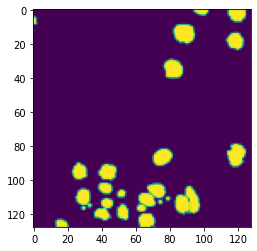

In [86]:
plt.imshow(Y_train[0].squeeze())

In [ ]:
spath = "train/images/test.png"
s2path = "train/masks/"

for n in range(len(train_ids)):
  path = spath + str(n) + ".png"
  imsave(path, X_train[n])
  img = Y_train[n].squeeze()
  path2 = s2path + str(n) + ".png"
  imsave(path2, img)


In [14]:
import cv2
img = cv2.imread("647.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img.shape

(128, 128)

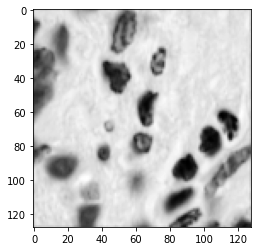

In [16]:
plt.imshow(img, cmap = "gray")